In [1]:
import torch
from torch.utils.data import Dataset, DataLoader
from torchvision import datasets, transforms
import time
import matplotlib.pyplot as plt

In [2]:
# Define a custom dataset class for MNIST
class CustomMNISTDataset(Dataset):
    def __init__(self, root, transform=None):
        self.dataset = datasets.MNIST(root=root, train=True, download=True, transform=transform)

    def __len__(self):
        return len(self.dataset)

    def __getitem__(self, idx):
        return self.dataset[idx]

In [3]:
# Function to measure loading time for a given dataloader
def measure_loading_time(dataloader):
    start_time = time.time()
    for batch in dataloader:
        pass
    end_time = time.time()

    return end_time - start_time

In [4]:
# Set up transforms and custom dataset
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))])

In [5]:
custom_dataset = CustomMNISTDataset(root='./data', transform=transform)

# Batch sizes to compare
batch_sizes = [128, 256, 512, 1024]

In [6]:
# Initialize lists to store loading times
custom_loading_times = []

# Compare loading times for each batch size
for batch_size in batch_sizes:
    custom_dataloader = DataLoader(custom_dataset, batch_size=batch_size, shuffle=True)
    custom_loading_time = measure_loading_time(custom_dataloader)
    custom_loading_times.append(custom_loading_time)

In [7]:
torch_loading_times = []
for batch_size in batch_sizes:
    # PyTorch Dataloader
    torch_dataloader = DataLoader(datasets.MNIST(root='./data', train=True, download=True, transform=transform), batch_size=batch_size, shuffle=True)
    torch_loading_time = measure_loading_time(torch_dataloader)
    torch_loading_times.append(torch_loading_time)

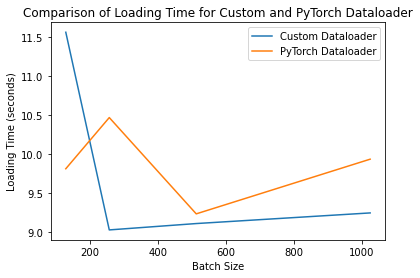

In [8]:
# Plotting the results
plt.plot(batch_sizes, custom_loading_times, label='Custom Dataloader')
plt.plot(batch_sizes, torch_loading_times, label='PyTorch Dataloader')
plt.xlabel('Batch Size')
plt.ylabel('Loading Time (seconds)')
plt.title('Comparison of Loading Time for Custom and PyTorch Dataloader')
plt.legend()
plt.show()